In [1]:
# Add magic command for matplotlib
%matplotlib inline

# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
# Set data paths
path_city_data = os.path.join("Resources", "city_data.csv")
path_ride_data = os.path.join("Resources", "ride_data.csv")

In [3]:
# Load city_data
city_data_df = pd.read_csv(path_city_data)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Load ride_data
ride_data_df = pd.read_csv(path_ride_data)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Check if there is Null values in city_data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()
# There is no null value in city_data

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Determine Data Types in city_data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Count the number of each area type in city_data
for i in city_data_df["type"].unique():
    print(f'{i}: {sum(city_data_df["type"] == i)}')

Urban: 66
Suburban: 36
Rural: 18


In [9]:
# Check if there is Null values in ride_data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
ride_data_df.isnull().sum()
# There is no null value in ride_data

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# Determine Data Types in ride_data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# Merge two DataFrames using a left join
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# Create 3 different DataFrame for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [14]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [15]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
# Count the number of rides for each city
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [18]:
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [19]:
# Calculate average fare for each city
urban_fare_avg = urban_cities_df.groupby("city").mean()["fare"]
urban_fare_avg.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
suburban_fare_avg = suburban_cities_df.groupby("city").mean()["fare"]
suburban_fare_avg.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [21]:
rural_fare_avg = rural_cities_df.groupby("city").mean()["fare"]
rural_fare_avg.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [22]:
# Create a serie containing the number of drivers for each city
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [24]:
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

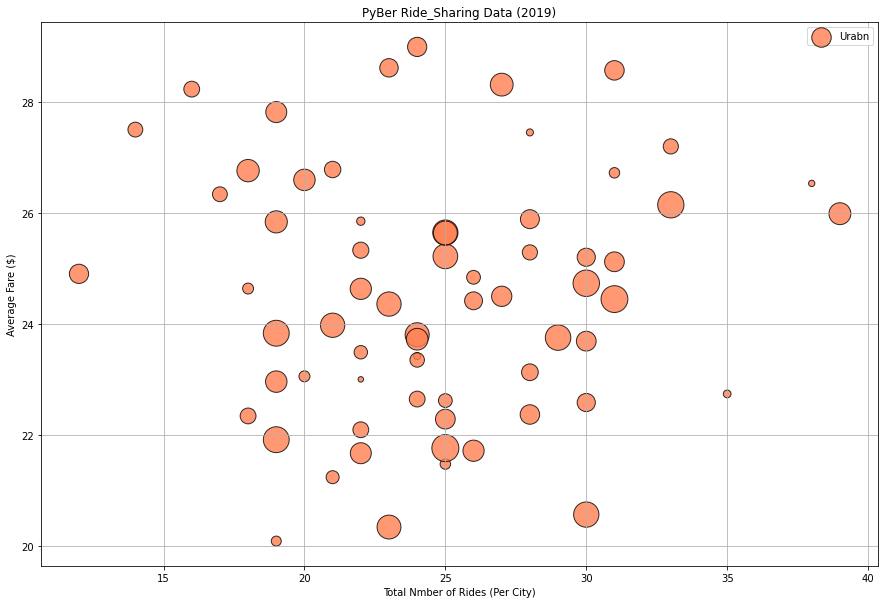

In [25]:
# Create bubble chart for each city type, individually
plt.figure(figsize=(15,10))
plt.scatter(
    urban_ride_count,
    urban_fare_avg,
    s=urban_driver_count*10,
    c="coral",
    edgecolor="black",
    linewidths=1,
    alpha=0.8,
    label="Urabn")
plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Nmber of Rides (Per City)")
plt.grid()
plt.legend()

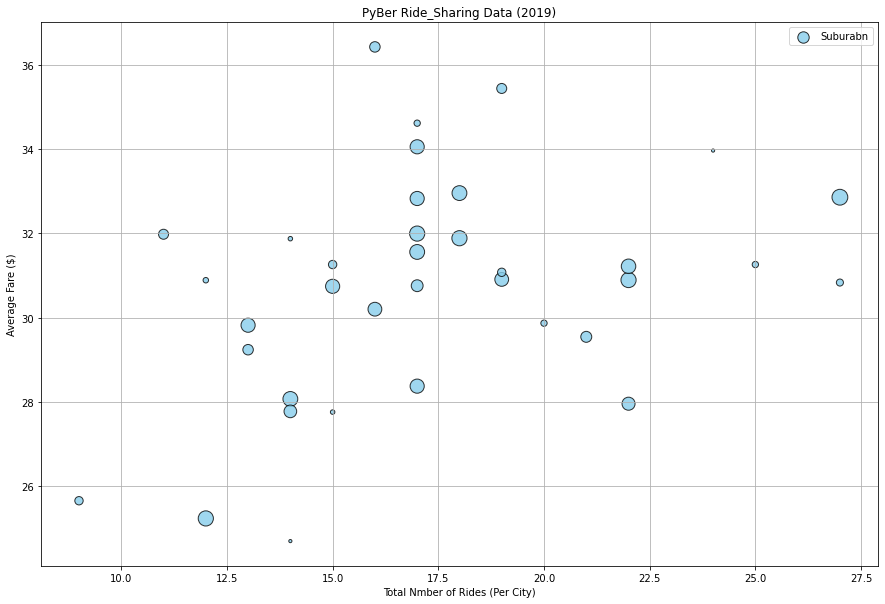

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(
    suburban_ride_count,
    suburban_fare_avg,
    s=suburban_driver_count*10,
    c="skyblue",
    edgecolor="black",
    linewidths=1,
    alpha=0.8,
    label="Suburabn")
plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Nmber of Rides (Per City)")
plt.grid()
plt.legend()

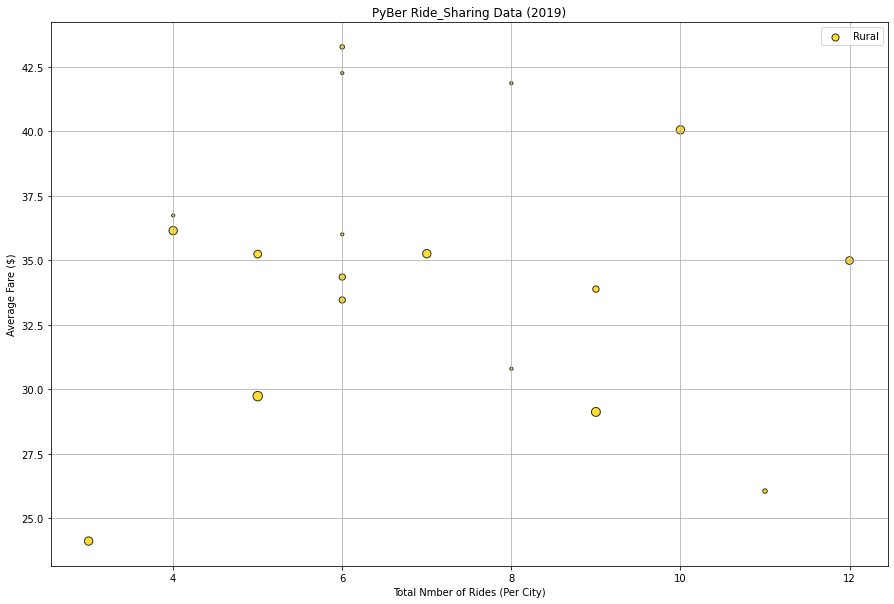

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(
    rural_ride_count,
    rural_fare_avg,
    s=rural_driver_count*10,
    c="gold",
    edgecolor="black",
    linewidths=1,
    alpha=0.8,
    label="Rural")
plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Nmber of Rides (Per City)")
plt.grid()
plt.legend()

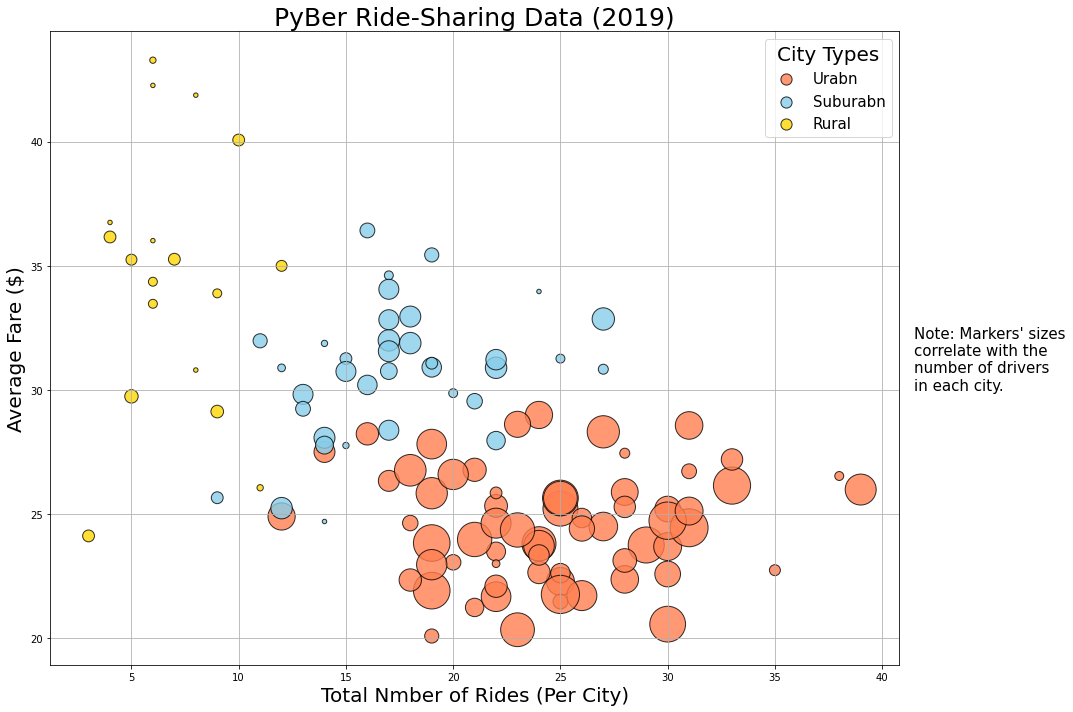

In [28]:
# Combine scatter charts for each city type to create the master Bubble Chart
plt.figure(figsize=(15,10))
plt.scatter(
    urban_ride_count,
    urban_fare_avg,
    s=urban_driver_count*20,
    c="coral",
    edgecolor="black",
    linewidths=1,
    alpha=0.8,
    label="Urabn")

plt.scatter(
    suburban_ride_count,
    suburban_fare_avg,
    s=suburban_driver_count*20,
    c="skyblue",
    edgecolor="black",
    linewidths=1,
    alpha=0.8,
    label="Suburabn")

plt.scatter(
    rural_ride_count,
    rural_fare_avg,
    s=rural_driver_count*20,
    c="gold",
    edgecolor="black",
    linewidths=1,
    alpha=0.8,
    label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=25, )
plt.ylabel("Average Fare ($)", fontsize=20)
plt.xlabel("Total Nmber of Rides (Per City)", fontsize=20)
plt.grid()

lgnd = plt.legend(fontsize=15,
                  mode="Expanded",
                  scatterpoints=1,
                  loc="best",
                  title="City Types")
lgnd.legendHandles[0]._sizes=[125]
lgnd.legendHandles[1]._sizes=[125]
lgnd.legendHandles[2]._sizes=[125]
lgnd.get_title().set_fontsize(20)

plt.text(41.5,30,
        "Note: Markers' sizes\ncorrelate with the\nnumber of drivers\nin each city.",
        fontsize=15)

# Save the chart
plt.tight_layout()
plt.savefig("Analysis/BubbleChart.png")

plt.show()

In [29]:
# Summary statistics for each city type
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [30]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [31]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [32]:
# Summary statistics for drivers' count DataFrames
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [34]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [35]:
# Calculate ride count mean for each city type
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# Calculate the measures of central tendency for the ride count via NumPy and SciPy
urban_ride_count_avg = np.mean(urban_ride_count)
urban_ride_count_median = np.median(urban_ride_count)
urban_ride_count_mode = sts.mode(urban_ride_count)

print(
    f"Ride Count Mean for Urban cities: {urban_ride_count_avg:.2f}\n"
    f"Ride Count Median for Urban cities: {urban_ride_count_median}\n"
    f"Ride Count Mode for Urban cities: {urban_ride_count_mode}")

Ride Count Mean for Urban cities: 24.62
Ride Count Median for Urban cities: 24.0
Ride Count Mode for Urban cities: ModeResult(mode=array([22]), count=array([7]))


In [37]:
# Calculate maserues of central tendency for Urban cities' fare
print(f' Mean fare for Urban cities: {np.mean(urban_cities_df["fare"]):.2f}\n'
      f' Median fare for Urban cities: {np.median(urban_cities_df["fare"])}\n'
      f' Mode fare for Urban cities: {sts.mode(urban_cities_df["fare"])}\n')

 Mean fare for Urban cities: 24.53
 Median fare for Urban cities: 24.64
 Mode fare for Urban cities: ModeResult(mode=array([22.86]), count=array([5]))



In [38]:
# Calculate maserues of central tendency for Suburban cities' fare
print(f' Mean fare for Suburban cities: {np.mean(suburban_cities_df["fare"]):.2f}\n'
      f' Median fare for Suburban cities: {np.median(suburban_cities_df["fare"])}\n'
      f' Mode fare for Suburban cities: {sts.mode(suburban_cities_df["fare"])}\n')

 Mean fare for Suburban cities: 30.97
 Median fare for Suburban cities: 30.75
 Mode fare for Suburban cities: ModeResult(mode=array([17.99]), count=array([3]))



In [39]:
# Calculate maserues of central tendency for Rural cities' fare
print(f' Mean fare for Rural cities: {np.mean(rural_cities_df["fare"]):.2f}\n'
      f' Median fare for Rural cities: {np.median(rural_cities_df["fare"])}\n'
      f' Mode fare for Rural cities: {sts.mode(rural_cities_df["fare"])}\n')

 Mean fare for Rural cities: 34.62
 Median fare for Rural cities: 37.05
 Mode fare for Rural cities: ModeResult(mode=array([37.05]), count=array([2]))



In [40]:
# Calculate maserues of central tendency for Urban cities' driver number
print(f' Mean number of drivers for Urban cities: {np.mean(urban_cities_df["driver_count"]):.0f}\n'
      f' Median number of drivers for Urban cities: {np.median(urban_cities_df["driver_count"])}\n'
      f' Mode number of drivers for Urban cities: {sts.mode(urban_cities_df["driver_count"])}\n')

 Mean number of drivers for Urban cities: 37
 Median number of drivers for Urban cities: 37.0
 Mode number of drivers for Urban cities: ModeResult(mode=array([39]), count=array([86]))



In [41]:
# Calculate maserues of central tendency for Suburban cities' driver number
print(f' Mean number of drivers for Suburban cities: {np.mean(suburban_cities_df["driver_count"]):.0f}\n'
      f' Median number of drivers for Suburban cities: {np.median(suburban_cities_df["driver_count"])}\n'
      f' Mode number of drivers for Suburban cities: {sts.mode(suburban_cities_df["driver_count"])}\n')

 Mean number of drivers for Suburban cities: 14
 Median number of drivers for Suburban cities: 16.0
 Mode number of drivers for Suburban cities: ModeResult(mode=array([20]), count=array([79]))



In [42]:
# Calculate maserues of central tendency for Rural cities' driver number
print(f' Mean number of drivers for Rural cities: {np.mean(rural_cities_df["driver_count"]):.0f}\n'
      f' Median number of drivers for Rural cities: {np.median(rural_cities_df["driver_count"])}\n'
      f' Mode number of drivers for Rural cities: {sts.mode(rural_cities_df["driver_count"])}\n')

 Mean number of drivers for Rural cities: 4
 Median number of drivers for Rural cities: 4.0
 Mode number of drivers for Rural cities: ModeResult(mode=array([1]), count=array([32]))



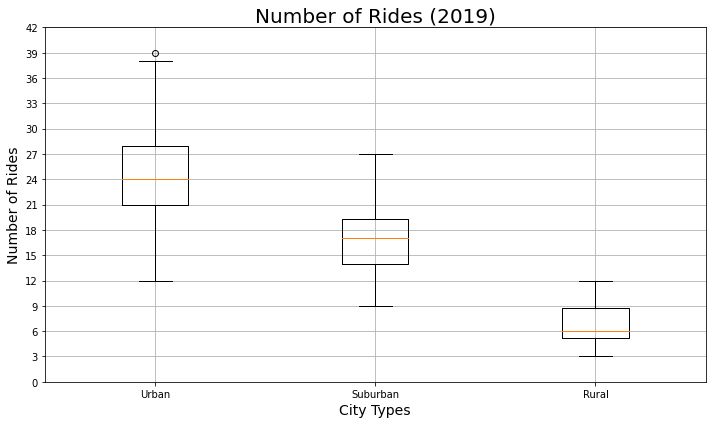

In [43]:
# Create Box-and-whisker plot for Number of Rides
xlabels = ['Urban','Suburban','Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig,ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels = xlabels)
ax.set_title('Number of Rides (2019)', fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,45,step=3))
ax.grid()
plt.tight_layout()
plt.savefig('Analysis/BoxChart.png')
plt.show()

In [44]:
urban_most_ride = urban_ride_count[urban_ride_count == 39].index[0]
print(f'The city with the most number of rides is {urban_most_ride}')

The city with the most number of rides is West Angela


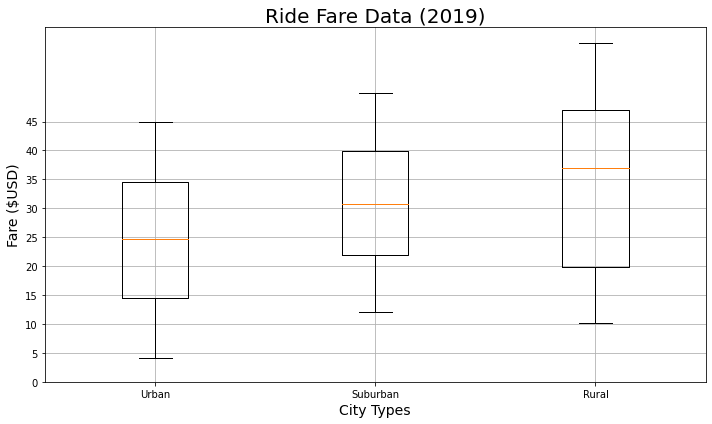

In [45]:
# Create Box-and-whisker plot for Fare
xlabels = ['Urban','Suburban','Rural']
ride_fare_data = [urban_cities_df["fare"],suburban_cities_df["fare"],rural_cities_df["fare"]]
fig,ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels = xlabels)
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,50,step=5))
ax.grid()
plt.tight_layout()
plt.savefig('Analysis/BoxChart2.png')
plt.show()

In [46]:
# Calculate percentage of Fares grouped by City Type
fares_by_city_type = pyber_data_df.groupby("type").sum()["fare"]
total_fares = fares_by_city_type.sum()
fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [47]:
labels = fares_by_city_type.values
labels = [i for i in labels]
labels

[4327.930000000002, 19356.330000000013, 39854.380000000085]

In [48]:
fares_percentage = fares_by_city_type / total_fares *100
fares_percentage

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

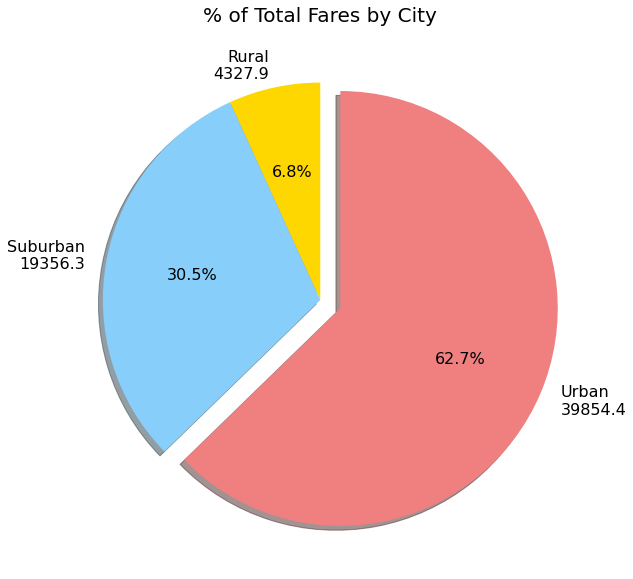

In [54]:
# Create Pie Chart for Fares
plt.figure(figsize=(10,10))
plt.pie(fares_percentage,
        labels=[f'Rural\n{labels[0]:.1f}',
                f'Suburban\n{labels[1]:.1f}',
                f'Urban\n{labels[2]:.1f}'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90
       )
plt.title('% of Total Fares by City', fontsize = 20)
mpl.rcParams['font.size']=16
plt.show()